# Assignment of Data Engineering Internship

### Task 1:
Write a function “common_words” which accepts two lists of strings and returns a list
which contains common elements from the two lists and also capitalises the strings
in the list. The function should also check the type of each input as a list else it
should raise an error.

In [3]:
def common_words_set():
    # Here the user will enter the first list.
    list1_input = input("Enter the first list of words separated by commas: ")
    list1 = [word.strip().lower() for word in list1_input.split(',')]

    # Moreover, now after entering the first list user will enter the second list.
    list2_input = input("Enter the second list of words separated by commas: ")
    list2 = [word.strip().lower() for word in list2_input.split(',')]

    # This step is being implemented for type checking of the list provided.
    if not isinstance(list1, list) or not isinstance(list2, list):
        raise ValueError("Both inputs must be lists")

    # Here I am converting list to sets and finding intersection between both lists.
    common_words = set(list1) & set(list2)

    # Now Capitalizing the common words present in lists.
    result = [word.upper() for word in common_words]
    
    return result

if __name__ == "__main__":
    print(common_words_set())

Enter the first list of words separated by commas:  KITCHEN, BATHROOM 1, BATHROOM 2, DINING ROOM, LIVING ROOM, BEDROOM 1, BEDROOOM 2, BEDROOM 3
Enter the second list of words separated by commas:  Kitchen, Bathroom 1, Bathroom 2, Dining Room, Living Room, Kids Room, Guest Room, Master Room


['BATHROOM 1', 'LIVING ROOM', 'DINING ROOM', 'BATHROOM 2', 'KITCHEN']


#### Brief Explaination:
In the above task 1, I have used Set Intersection for the following reasons:
1. It has efficient time complexity as it is converting a list to a set takes O(n)time, and finding the intersections of both sets takes O(min(len(set1),len(set2)))time.
2. Also this method has good flexibility to handle big datasets by reducing the problem to set operations, which are highly optimized in python.
3. Though, it requires memory corresponding to the size of list but the operations are fast and efficient.
   
However, here I have used .lower() to remove case sensitive comaprison from both list. As This ensure that word should be considered same in all cases.
In addition, I have also used isinstance() to ensure both list 1 and list 2 are lists before proceeding and if not the it will raise ValueError.

### Task 2:
Write a python code to read the sales dataset , transform it into a dataframe and
perform the following tasks
1. Find the total sales per month for the categories “Furniture” and “Technology” also
plot the results.
2. Identify the top 2 products by sales volume in category “Office Supplies”.
3. Calculate the revenue generated by sub-category “Phones” and “Accessories”

In [5]:
# Here I have imported all required libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd

In [6]:
# Loading the dataset
sales_order = pd.read_excel('Sales.xlsx', sheet_name='Orders')
sales_order.head()

,Row ID,Order ID,Order Date,Ship Date,Delivery Duration,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Discount Value,Profit,COGS
0,1,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire Gute,Consumer,United States,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,0.000000,41.9136,-220.046400
1,2,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire Gute,Consumer,United States,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,0.000000,219.5820,-512.358000
2,3,CA-2016-138688,2016-06-12,2016-06-16,4,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,0.000000,6.8714,-7.748600
3,4,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-430.909875,-383.0310,-909.698625
4,5,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,-4.473600,2.5164,-15.378000


In [21]:
sales_order.dtypes

Row ID                        int64
Order ID                     object
Order Date           datetime64[ns]
Ship Date            datetime64[ns]
Delivery Duration             int64
Ship Mode                    object
Customer ID                  object
Customer Name                object
Segment                      object
Country                      object
City                         object
State                        object
Postal Code                   int64
Region                       object
Product ID                   object
Category                     object
Sub-Category                 object
Product Name                 object
Sales                       float64
Quantity                      int64
Discount                    float64
Discount Value              float64
Profit                      float64
COGS                        float64
dtype: object

In [7]:
sales_order.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Delivery Duration',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country',
       'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Discount Value', 'Profit', 'COGS'],
      dtype='object')

In [24]:
#To check missing values if any present in dataset.
sales_order.isnull().values.any()

# To Get the count of missing values for each column. 
missing_values = sales_order.isnull().sum()
print(missing_values)

Row ID               0
Order ID             0
Order Date           0
Ship Date            0
Delivery Duration    0
Ship Mode            0
Customer ID          0
Customer Name        0
Segment              0
Country              0
City                 0
State                0
Postal Code          0
Region               0
Product ID           0
Category             0
Sub-Category         0
Product Name         0
Sales                0
Quantity             0
Discount             0
Discount Value       0
Profit               0
COGS                 0
dtype: int64


In [25]:
# To check duplicacy if any present in dataset.
duplicates = sales_order.duplicated()
print(duplicates.sum())  # Number of duplicate rows


0


Before performing the list of tasks on sales dataset. Firstly, I explored the dataset and performed preprocessing to ensure the dataset quality.

#### 1. Find the total sales per month for the categories “Furniture” and “Technology” also plot the results.

C:\Users\Anshula\AppData\Local\Temp\ipykernel_5892\111987447.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year-Month'] = filtered_data['Order Date'].dt.to_period('M')


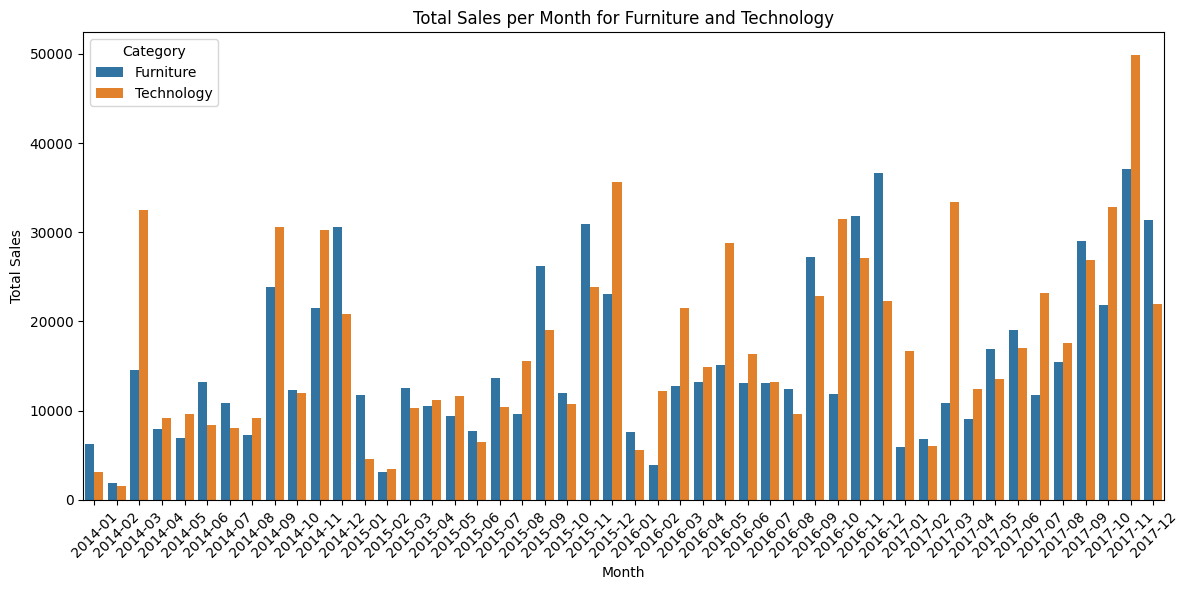

In [28]:
# Just to Ensure that the date column is in datetime format
sales_order['Order Date'] = pd.to_datetime(sales_order['Order Date'])

# Now Filtering the data for the categories "Furniture" and "Technology"
filtered_data = sales_order[sales_order['Category'].isin(['Furniture', 'Technology'])]

# However, here I have Extracted the month and year from the order date
filtered_data['Year-Month'] = filtered_data['Order Date'].dt.to_period('M')

# Now Grouping by category and month, then sum the sales
monthly_sales = filtered_data.groupby(['Year-Month', 'Category'])['Sales'].sum().reset_index() 

# Plotting the results using Seaborn for better visualisation
plt.figure(figsize=(12, 6))
sns.barplot(x='Year-Month', y='Sales', hue='Category', data=monthly_sales)
plt.title('Total Sales per Month for Furniture and Technology')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # By Rotating x-axis labels  to 45 degrees to get better readability
plt.tight_layout()
plt.show()


Here, I have used seaborn library for plotting results in barplot. The reason of selecting a barploting for this presentation is because it's easy to interpet and clearly shows the difference in sales between these two categories per month.

#### 2. Identify the top 2 products by sales volume in category “Office Supplies”.

In [29]:
# To Filter the data for the category "Office Supplies"
office_supplies_data = sales_order[sales_order['Category'] == 'Office Supplies']

# Now Grouping by product and sum the sales volume
top_products = office_supplies_data.groupby('Product Name')['Sales'].sum().nlargest(2)

# Now here let's Display the top 2 products
print("Top 2 Products by Sales Volume in Category 'Office Supplies':")
print(top_products)


Top 2 Products by Sales Volume in Category 'Office Supplies':
Product Name
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


#### Brief Explanation:
The pupose of performing above mention task in such way because:
1. Firstly by filtering the data reduces the amount of data processed in subsequent steps and makes operations faster.
2. Also this method of implementations can handle large datasets efficiently by using pandas.
3. However, by using grouping and suming we are able to get accurate sales for the product. And by using 'nlargest' it's easy to identify the top products.

#### 3. Calculate the revenue generated by sub-category “Phones” and “Accessories”

In [13]:
# Filter the data for the sub-categories "Phones" and "Accessories"
sub_category_data = sales_order[sales_order['Sub-Category'].isin(['Phones', 'Accessories'])]

# Group by sub-category and sum the sales to get the revenue
revenue_by_sub_category = sub_category_data.groupby('Sub-Category')['Sales'].sum()

# Display the revenue
print("Revenue Generated by Sub-Category 'Phones' and 'Accessories':")
print(revenue_by_sub_category)


Revenue Generated by Sub-Category 'Phones' and 'Accessories':
Sub-Category
Accessories    167380.318
Phones         330007.054
Name: Sales, dtype: float64


### Task 3:
Write a SQL code (postgres preferably) which does the following things:
- Create a table with 4 fields (name and data type of your choices)
- Insert 10 lines of data into the created table
- Create 2 users
- User 1 should have read access to the table you created
- User 2 should NOT have access to the table you created.
- Create a simple aggregation query over the created table and store its results
into another table.

#### Create Table with 4 fields

In [ ]:
CREATE TABLE kitchen_products (
    id SERIAL PRIMARY KEY,
    name VARCHAR(100) NOT NULL,
    quantity INTEGER NOT NULL,
    price DECIMAL(10, 2) NOT NULL
);

#### Insert 10 lines of data into the created table

In [ ]:
INSERT INTO kitchen_products (name, quantity, price) VALUES
('Salt', 100, 1.50),
('Pepper', 200, 2.00),
('Olive Oil', 50, 5.00),
('Sugar', 150, 1.75),
('Flour', 300, 2.50),
('Butter', 75, 3.00),
('Milk', 200, 1.20),
('Eggs', 12, 2.20),
('Cheese', 100, 4.00),
('Tomato Sauce', 80, 1.80);

#### Create 2 Users

In [ ]:
CREATE USER user1 WITH PASSWORD 'password1';
CREATE USER user2 WITH PASSWORD 'password2';

#### Granting read access to User 1 and not to User 2

In [ ]:
GRANT CONNECT ON DATABASE kitchen_products TO user1;
GRANT USAGE ON SCHEMA public TO user1;
GRANT SELECT ON kitchen_products TO user1;

#### Create a simple aggregation query over the created table and store its results into another table.

In [ ]:
CREATE TABLE kitchen_product_summary AS
SELECT
    name,
    SUM(quantity) AS total_quantity,
    AVG(price) AS average_price
FROM kitchen_products
GROUP BY name;

#### Brief Explaination
Since, here I have created kitchen_products table with four fields with respect to their datatypes. Along with this, later I entered values of mentioned fields. Whereas, as mentioned later I created two user IDs and given access to user1 (Landlord) only and not to user2 (Tenant). Therefore in the end, an aggregation query is run to create a summary table of kitchen_product_summary, which includes the total quantity and average price of each product in the kitchen_products table.
